# Titanic - Shipwreck Survival Prediction
<img src = "https://static.geo.de/bilder/e7/1c/935/mobile_feed_original960/48b4f0ced0b53ae0114b49554f5d72d9.jpg">

### Context of the Business Problem
<blockquote> Titanic, in full Royal Mail Ship (RMS) Titanic, was a British luxury passenger liner that sank on April 14th – 15th, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 passengers and ship personnel. One of the most famous tragedies in modern history and has been the subject of much scholarship and scientific speculation.</blockquote>

### Problem Statement
<blockquote>Using the K-Nearest Neighbours Classifier and given a number of features, predict whether a passenger onboard the Titanic survived the shipwreck.</blockquote>

### Experimental Research Design
<blockquote>True Experimental Research Design This is the methodology we will to use for this research experiment.

A true experiment research design is a type of experimental design used to test and reject or fail to reject a hypothesis by using statistical analysis as the means of investigation. This type of experiment can also be used to determine cause and effect relationships within groups.</blockquote>

The following are the assumptions that must be satisfied in order to use the true experiment research design :

<li>Control group and experimental group</li>
<li>Researcher - manipulated variable(s)</li>
<li>Random distribution</li>

### Evaluation Metrics
We will use the following metics to evalute the performance of our models:

<li>Accuracy score</li>
<li>Precission</li>
<li>F1 score</li>

### Project Plan
<li>Definition of the research question</li>
<li>Data Understanding</li>
<li>Exploration of the data.</li>
<li>Data preparation and cleaning.</li>
<li>Implementing the solution</li>
<li>Prediction</li>
<li>Evaluation of the solution</li>
<li>Summary of findings</li>
<li>Conclusions</li>

### 1. Importing Libraries

In [621]:
# Import Libraries

import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# Other libraries
import warnings
warnings.filterwarnings('ignore')

### 2. Load datasets

In [622]:
## Importing the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 3. Explore the datasets

In [623]:
# Heads and Tails
print('Train Dataset: ')
train.head()

Train Dataset: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [624]:
print('Test Dataset: ')
test.head()

Test Dataset: 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Data Description
Below is the desciption of the features in the dataset.

<li>Survival - Survival : 0 = No, 1 = Yes</li>
<li>Pclass - Ticket Class : 1 = 1st, 2 = 2nd, 3 = 3rd</li>
<li>Sex - Sex</li>
<li>Age - Age in years</li>
<li>sibsp -	Number of siblings or spouses aboard the Titanic</li>
<li>Parch -	Number of parents or children aboard the Titanic</li>
<li>Ticket - Ticket Number</li>
<li>Fare - Passenger Fare</li>
<li>Cabin -	Cabin Number</li>
<li>Embarked - Port of Embarkation : C = Cherbourg, Q = Queenstown, S = Southampton</li>


In [625]:
# Shape of the datasets
# Train dataset
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [626]:
# Test dataset
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


<blockquote>We note that the train set has 891 rows and 12 columns while the test set has 418 rows and 11 columns</blockquote>

In [627]:
# Using the describe function to get the general description of the data.
print('Train dataset:')
train.describe().T

Train dataset:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [628]:
print('Test dataset:')
test.describe().T

Test dataset:


,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [629]:
# Datatypes

# Checking for the column datatypes
print('Train dataset:')
print(train.dtypes)
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print('Test dataset:')
print(test.dtypes)

Train dataset:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Test dataset:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### 4. Tidying the dataset

In [630]:
# Renaming the columns
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [631]:
# Confirm
print(train.columns)
print(test.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')
Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


<blockquote>We can confirm that all the columns have been changed to lower case</blockquote>

In [632]:
# Duplicated records
# Checking for duplicates in the data using the duplicated() function
# any() functions returns a true or false result to the query of missing values
# Train set
train.duplicated(keep = 'first').any()

False

In [633]:
# Test set
test.duplicated(keep = 'first').any()

False

<blockquote>We observe that we have no duplicated record in both train and test sets</blockquote>

In [634]:
# Missing values
# Using a isnull() funstion to check for null values in our data.
# Using a sum() function returns the sum of all missing values per column.

print(train.isnull().sum())
print("+++++++++++++++++++++++++++++")
print(test.isnull().sum())

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64
+++++++++++++++++++++++++++++
passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64


<blockquote> We observe that the train dataset had 177 missing values in the age column and 687 missing values in the cabin columns. In the test dataset also we have 86 missing values in the age column and 327 missing values in the cabin column</blockquote>

In [635]:
# Drop unnecesecary columns
# Train dataset
train.drop(['cabin', 'passengerid'], axis=1, inplace = True)
train

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [636]:
# Drop unnecesecary columns
# Test Dataset
test.drop(['cabin', 'passengerid'], axis=1, inplace = True)
test

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [637]:
# Impute the missing values in the age column with the mean

train['age'].fillna((train['age'].mean()), inplace=True)
test['age'].fillna((test['age'].mean()), inplace=True)

### 5. EDA
#### Univariate Analysis

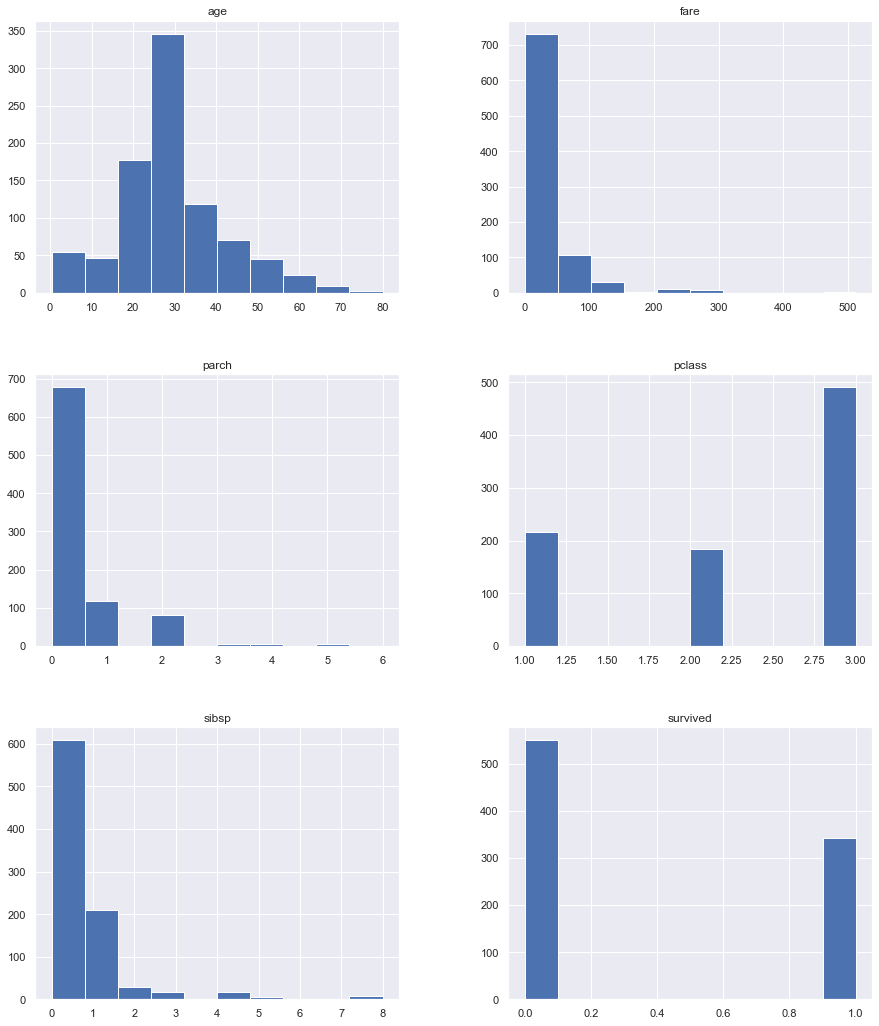

In [638]:
# Histograms
train.hist(figsize=(15,18))
plt.show()

**Observations**
<li><b>Age column:</b> is slightly skewed to the right with majority of the passengers being around 25 to 30 years</li>
<li><b>Fare column:</b> the most of the fare prices was less than 50 </li>
<li><b>Parch column:</b> most passengers aboard were not parents/children </li>
<li><b>Pclass column:</b> this indicated the passenger class and it shows that most passengers aboard boarded the 3rd class</li>
<li><b>Sibsp column:</b> Most passengers aboard did not have siblings or spouses on board</li>
<li><b>survived column:</b> Most passengers aboard did not survive</li>

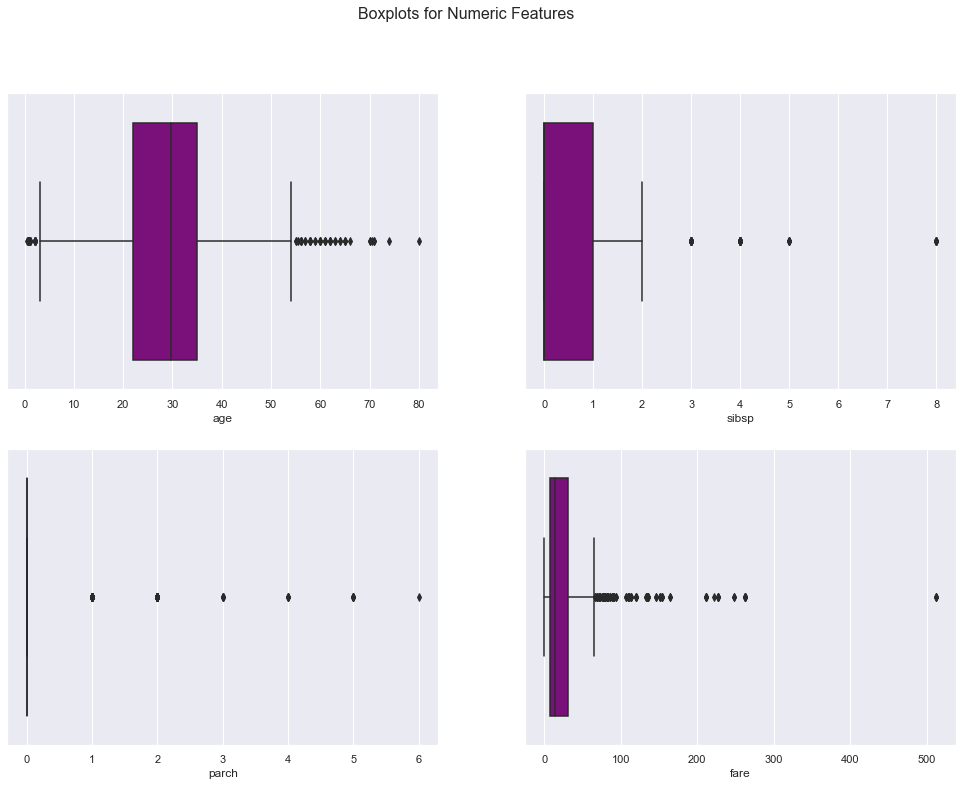

In [639]:
# Checking for outliers using boxplots

num = ['age', 'sibsp', 'parch', 'fare']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 12))
for ax, data, name in zip(axes.flatten(), train, num):
  sns.boxplot(train[name], color = 'darkmagenta', ax = ax)
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

<blockquote>The numerical features have outliers that will be investigated further</blockquote>

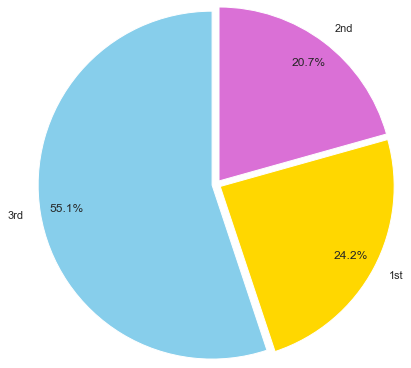

In [640]:
# Checking the proportion of travellers in for the passenger class aboard

class_pie = train['pclass'].value_counts()

labels = ['3rd', '1st', '2nd']
colors = ['skyblue', 'gold', 'orchid']
explode = [0.05, 0.05, 0.05]

# Creating the pie chart
plt.pie(class_pie,labels = labels, colors=colors, startangle=90, autopct='%1.1f%%', 
        pctdistance=0.85,center = (0.5,0.5),  explode = explode, radius = 2)
# plt.title("Distribution of Passengers per Class")
plt.show()

<blockquote>Most of passengers purchased 3rd class tickets at 55.1%, followed by 1st class at 24.2% and finally 2nd class at 20.7% of the passengers aboard.</blockquote>

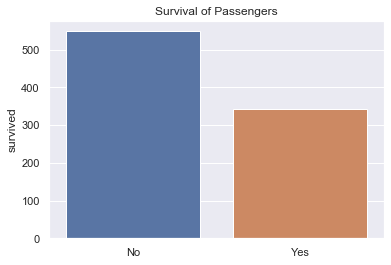

In [641]:
# Counting the number of passengers that survived the shipwreck vs those who did not survive.
survivors =  train['survived'].value_counts()

# Now visualizing this information  in the form of bar plots
labels = ['No', 'Yes']
#colors = ['c', 'alpha']

sns.barplot(x = labels, y = survivors)
plt.title('Survival of Passengers')
plt.show()

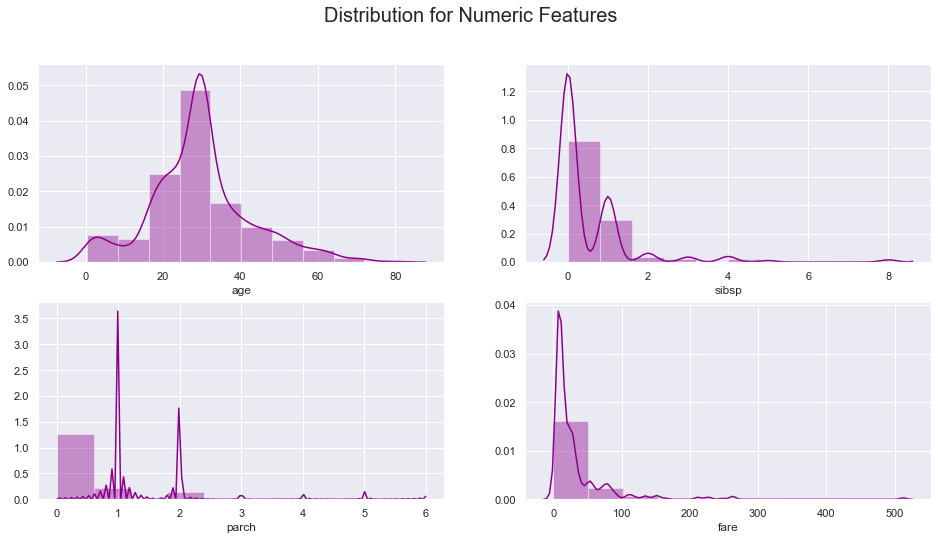

In [642]:
# Checking the distribution of our data using distribution plots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 8))

for ax, name, data in zip(axes.flatten(), num, train):
  sns.distplot(train[name], hist = True, ax = ax, bins = 10, color = 'darkmagenta')
  plt.suptitle('Distribution for Numeric Features', fontsize = 20)
  plt.subplots_adjust()

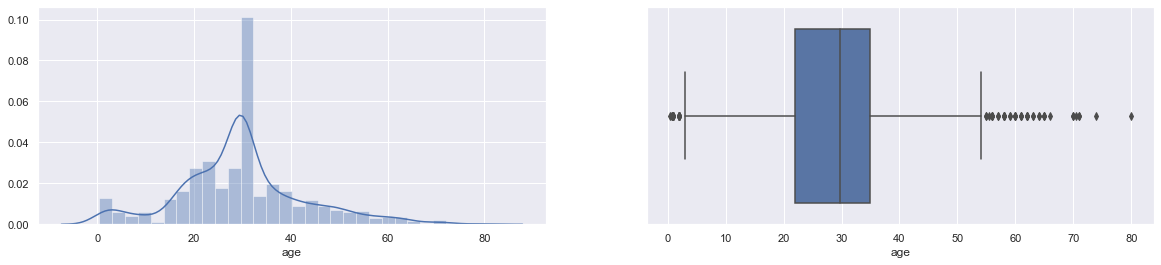

In [643]:
# Distribution of age
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(train['age'])
f.add_subplot(1,2,2)
sns.boxplot(train['age'])

<blockquote>We observe that most of the passengers aboard were ~30 years. Most of the passengers ranged till ~55 years with one passenger at 80 years </blockquote>

#### Bivariate Analysis

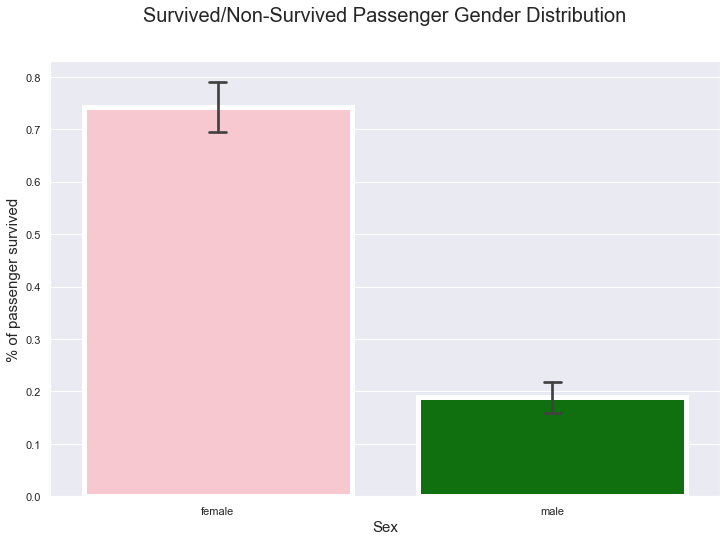

In [644]:
# Compare Gender vs Survival

import seaborn as sns
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (12,8))
ax = sns.barplot(x = "sex", 
                 y = "survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05)

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 20,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

<blockquote>This bar plot above shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. This bar plot shows that about 74% female passenger survived while only around 19% male passenger survived.</blockquote>

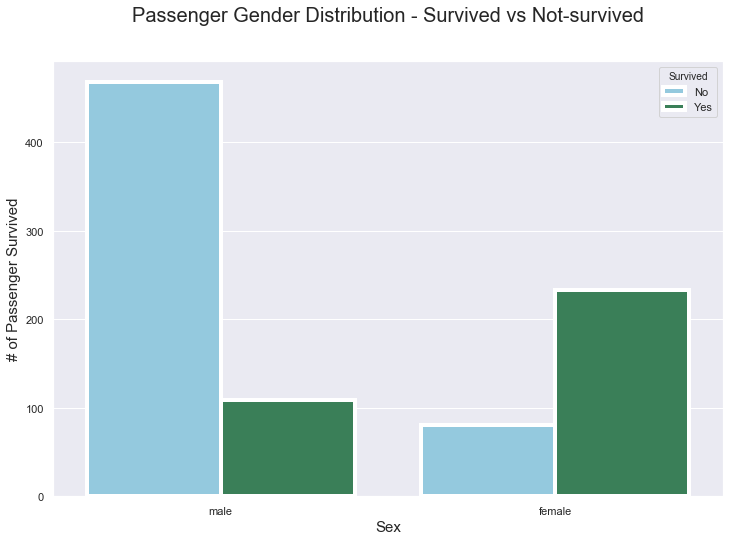

In [645]:
# Gender distribution vs Survival

pal = {1:"seagreen", 0:"skyblue"}
sns.set(style="darkgrid")
plt.subplots(figsize = (12,8))
ax = sns.countplot(x = "sex", 
                   hue="survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)
## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 20, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

<blockquote>We observe the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females 230 survived and 70 did not survive. While among male passengers 110 survived and 480 did not survive.</blockquote>
<blockquote>We observe that female passengers had survived at a much better rate than male passengers.</blockquote>

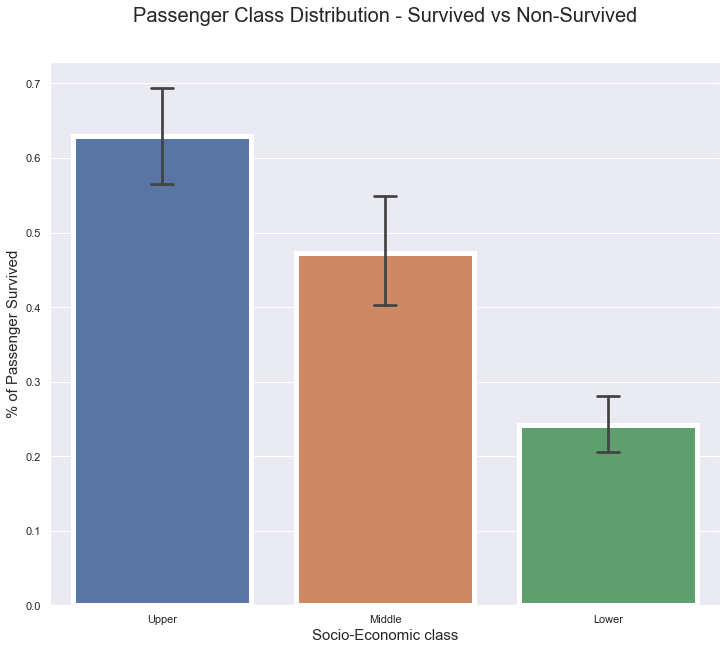

In [646]:
# Passenger class vs Survival

plt.subplots(figsize = (12,10))
sns.barplot(x = "pclass", 
            y = "survived", 
            data=train, 
            linewidth=5,
            capsize = .1

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 20, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

<blockquote>We observe that 63% first class passenger survived titanic tragedy, while 48% second class and only 24% third class passenger survived.</blockquote>

#### Multivariate

In [647]:
train.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

In [648]:
# Correlations among varables vs survived column
pd.DataFrame((train.corr()['survived']).sort_values(ascending = False))

,survived
survived,1.000000
fare,0.257307
parch,0.081629
sibsp,-0.035322
age,-0.069809
pclass,-0.338481


<function matplotlib.pyplot.show(*args, **kw)>

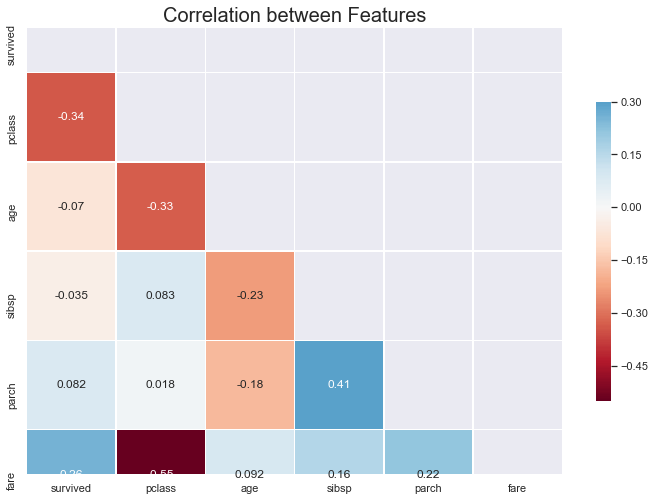

In [649]:
# heatmap to see the correlation between features. 

correlations = train.corr() 
mask = np.zeros_like(correlations, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(12, 11))  
_ = sns.heatmap(correlations, mask=mask, cmap='RdBu', vmax=.3, center=0, 
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Correlation between Features', fontsize = 20)
plt.show

Observations:
<li>pclass and fare are negatively correlated</li>
<li>parch and sibsp are positively correlated</li>

### 6. Feature Eningeering

#### Add a column

In [650]:
# add family size as a feature
train['famsize'] = train['parch'] + train['sibsp']

In [651]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,famsize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


**Select Columns to use**

In [652]:
train.drop(columns = ['name', 'ticket', 'sibsp', 'parch'], axis = 1 , inplace = True)
train.head()

,survived,pclass,sex,age,fare,embarked,famsize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [653]:
# Apply dummy categories
# pd.get_dummies(train['embarked'],drop_first=True).head()

In [654]:
# # Encode columns
# sex = pd.get_dummies(train['sex'],drop_first=True)
# embark =  pd.get_dummies(train['embarked'],drop_first=True)

In [655]:
# Convert sex to int 
train.sex.replace({'male':0, 'female':1}, inplace = True)
train.head()

,survived,pclass,sex,age,fare,embarked,famsize
0,0,3,0,22.0,7.2500,S,1
1,1,1,1,38.0,71.2833,C,1
2,1,3,1,26.0,7.9250,S,0
3,1,1,1,35.0,53.1000,S,1
4,0,3,0,35.0,8.0500,S,0


In [656]:
train.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [657]:
# Replace missing value with S which is the mode
train['embarked'].fillna( 'S' , inplace = True)

In [658]:
train.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [659]:
# Convert sex to int 
train.embarked.replace({'S':0, 'C':1, 'Q':2}, inplace = True)
train.head()

,survived,pclass,sex,age,fare,embarked,famsize
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,0,1
4,0,3,0,35.0,8.0500,0,0


### 7. Implement the Solution
#### Split Dataset

In [660]:
# Splitting the data into the independent and dependent variables
X = train.drop(['survived'], axis=1)
y = train.survived

In [661]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Scale the dataset

In [662]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Fit the model

In [663]:
# Fitting the KNN classifier model to the training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)

# Compare the predictions made by the model
comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
comparison_frame.sample(5)


,Actual,Predicted
845,0,0
591,1,1
10,1,1
643,1,1
426,1,1


#### Evaluate the model

In [664]:
# 1. Using Classification report
print(classification_report(y_test, y_pred))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

[[90 15]
 [20 54]]
F1 Score:  0.7552447552447553


<blockquote>The accuracy is 75.5%</blockquote>

#### Hyperparameter Tuning

In [665]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,15))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 7
Best p: 1
Best n_neighbors: 3


<blockquote>After hyperparameter tuning, we find our best parameters that would be suitable for our model: 
    <li>Best leaf_size: 7</li>
    <li>Best p: 1</li>
    <li>Best n_neighbors: 3 </li>
</blockquote>

**Using the best parameters**

In [666]:
# Fitting the KNN classifier model to the training data
knn = KNeighborsClassifier(n_neighbors=3, p=1, leaf_size=7)
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)

# 1. Using Classification report
print(classification_report(y_test, y_pred))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[92 13]
 [19 55]]
F1 Score:  0.7746478873239436


<blockquote> After using the best parameters the score has improved to 77.5% </blockquote>

#### Optimize using LDA

In [667]:
# Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Fitting the KNN classifier model to the training data
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train, y_train)

# Predicting the outcome
y_pred1 = knc.predict(X_test)

# Evaluate Perfomance
cm = confusion_matrix(y_test, y_pred1)
print(cm)
print(f1_score(y_test, y_pred1, average='weighted'))

[[89 16]
 [22 52]]
0.7861729657897729


<blockquote>After LDA Optimization, the score has improved to 78.6%</blockquote>

#### Try the same for a 70-30 Split

In [668]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the KNN classifier model to the training data
knn = KNeighborsClassifier(n_neighbors=3, p=1, leaf_size=7)
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)

# 1. Using Classification report
print(classification_report(y_test, y_pred))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.81      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

[[139  18]
 [ 34  77]]
F1 Score:  0.7475728155339806


<blockquote>If we use a 70-30 split the perfomance is 74.8% without any optimizations</blockquote>

#### Using a 60-40 Split

In [669]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the KNN classifier model to the training data
knn = KNeighborsClassifier(n_neighbors=3, p=1, leaf_size=7)
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)

# 1. Using Classification report
print(classification_report(y_test, y_pred))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       181
           1       0.82      0.71      0.76       122

    accuracy                           0.82       303
   macro avg       0.82      0.80      0.81       303
weighted avg       0.82      0.82      0.82       303

[[162  19]
 [ 35  87]]
F1 Score:  0.7631578947368421


<blockquote>If we use a 60-40 split the perfomance is 76.3% without any optimizations</blockquote>

### Challenging the Solution

In [670]:
# Random Forest

# Splitting the data into test and train sets as provided earlier
# NOTE: No further split is done.

X= train.drop('survived', axis = 1)
y= train['survived']
# X_test = test.copy()

# Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instantiating our model
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=10,
                                       n_jobs=-1) #  Whether to use out-of-bag samples to estimate the generalization accuracy.
forest = forest.fit(X_train, y_train)

# Making predictions
Y_prediction = forest.predict(X_test)

# Evaluating the model
forest.score(X_train, y_train)

acc_random_forest = round(forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

from sklearn.model_selection import cross_val_predict
# Generating cross-validated estimates for each input data point
predictions = cross_val_predict(forest, X_train, y_train, cv=3)


print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

89.41 %
[[345  36]
 [ 72 170]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       381
           1       0.83      0.70      0.76       242

    accuracy                           0.83       623
   macro avg       0.83      0.80      0.81       623
weighted avg       0.83      0.83      0.82       623



<blockquote>The score increases to 89.41% when using Random Forest, which is a better model compared to KNN.

However, tuning may be needed to assess the model adequately.</blockquote>

### Conlusion

From the analysis: Tuning and Optimizing the KNN model is highly recommended to improve the performance of the model.

Splitting the data into 80,20 train and test sets and using the best parametersyielded the best accuracies.